<a href="https://colab.research.google.com/github/yuhui-0611/ESAA/blob/main/YB_1010_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 모듈 및 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data

# 악성을 1, 양성을 0으로 > 원 데이터에서는 악성이 0이고 양성이 1임
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs')
model_lor.fit(X,y)
y_pred = model_lor.predict(X)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [2]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

**오차 행렬(혼동 행렬) 생성**

In [4]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[337,  20],
       [ 30, 182]])

**정확도의 개념을 설명하고, 정확도를 구해 해당 값을 통해 알 수 있는 점을 쓰시오.**

In [5]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y, y_pred))

0.9121265377855887


개념: 전체 데이터 중에서 모델이 정답을 맞춘 비율

즉, (맞게 예측한 개수) ÷ (전체 예측 개수)

해석: 모델이 전체 샘플의 약 91.2%를 올바르게 예측했음을 의미

**정밀도의 개념을 설명하고, 정확도를 구해 해당 값을 통해 알 수 있는 점을 쓰시오.**

In [6]:
from sklearn.metrics import precision_score
print(precision_score(y,y_pred))

0.900990099009901


개념: 모델이 양성이라고 예측한 것 중 실제로 양성인 비율

즉, True Positive / (True Positive + False Positive)

해석: 모델이 양성이라고 판단한 샘플 중 약 90.1%만 실제로 양성 > 거짓 양성(False Positive) 을 줄이는 데 초점

**재현율의 개념을 설명하고, 정확도를 구해 해당 값을 통해 알 수 있는 점을 쓰시오.**

In [7]:
from sklearn.metrics import recall_score
print(recall_score(y,y_pred))

0.8584905660377359


개념: 실제 양성인 것 중에서 모델이 양성이라고 잘 찾아낸 비율

즉, True Positive / (True Positive + False Negative)

해석: 실제 양성 중 약 85.8%를 모델이 정확히 찾아냈음을 의미 > 거짓 음성(False Negative) 을 줄이는 데 중요

**F1 score의 개념을 설명하고, 정확도를 구해 해당 값을 통해 알 수 있는 점을 쓰시오.**

In [8]:
from sklearn.metrics import f1_score
print(f1_score(y, y_pred))

0.8792270531400966


개념: 정밀도와 재현율의 조화평균으로, 두 지표의 균형을 평가
> 둘 중 하나라도 낮으면 전체 점수도 낮게 나오기에 균형 잡힌 모델을 선정할 수 있도록 하기 위함

해석: 정밀도(0.90)와 재현율(0.86) 사이에서 균형 잡힌 성능을 보여주며, 모델의 전반적인 분류 성능이 양호한 수준(약 87.9%)임을 알 수 있음

**예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정**

In [10]:
from sklearn.preprocessing import Binarizer

pred_proba = model_lor.predict_proba(X)
pred_proba1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold = 0.1)
# y_pred2 = (model_lor.predict_proba(X)[:,1]>0.1).astype(np.int)로도 가능
y_pred2 = binarizer.transform(pred_proba1)

In [11]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기

print(confusion_matrix(y,y_pred2)) # 혼동행렬
print(accuracy_score(y, y_pred2)) # 정확도
print(precision_score(y,y_pred2)) # 정밀도
print(recall_score(y,y_pred2)) # 재현율
print(f1_score(y, y_pred2)) # f1 score

[[267  90]
 [  6 206]]
0.8312829525483304
0.6959459459459459
0.9716981132075472
0.8110236220472441


임계값의 기본값이 0.5이기에 원래 0.5보다 크면 전부 1로 분류되던 것이, 0.1로 줄어들었기에 0.1보다 크면 다 1로 분류됨

즉, 임계값을 낮추었기에 모델이 양성이라고 쉽게 판단하고, 거짓 양성이 늘어나 점수가 줄어드는 것임

**ROC 곡선 시각화**

In [12]:
from sklearn.metrics import roc_curve

probas = model_lor.predict_proba(X)
fpr, tpr, thresholds = roc_curve(y, probas[:,1])

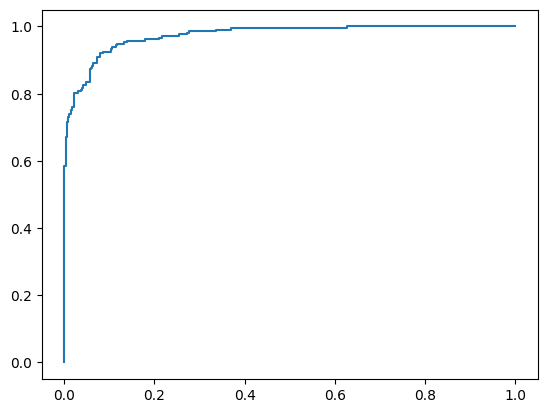

In [13]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label = "ROC")

**ROC AUC 값을 구하고 해당 값을 통해 알 수 있는 점을 쓰시오.**

In [14]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y, y_pred))

0.9012340785370753


값이 1에 가까울수록 양성과 음성을 더 정확히 구분하는 모델로, 이 모델은 두 클래스를 약 90% 확률로 올바르게 구분한다는 의미